In [1]:
from datasets import load_dataset, Dataset, DatasetDict
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import emoji
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Create dataset

In [2]:
ds_dogwhistle = load_dataset("SALT-NLP/silent_signals")
ds_potential_reddit = load_dataset("SALT-NLP/informal_potential_dogwhistles")
ds_potential_congress = load_dataset("SALT-NLP/formal_potential_dogwhistles")

Found cached dataset parquet (C:/Users/aurel/.cache/huggingface/datasets/SALT-NLP___parquet/SALT-NLP--silent_signals-0fa73465b941e951/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/aurel/.cache/huggingface/datasets/SALT-NLP___parquet/SALT-NLP--informal_potential_dogwhistles-ab66d05d7c9afd8d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/aurel/.cache/huggingface/datasets/SALT-NLP___parquet/SALT-NLP--formal_potential_dogwhistles-a57188fbcad642b3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
print(ds_dogwhistle)
print(ds_potential_reddit)
print(ds_potential_congress)

DatasetDict({
    train: Dataset({
        features: ['dog_whistle', 'dog_whistle_root', 'ingroup', 'content', 'date', 'speaker', 'chamber', 'subreddit', 'source', 'definition', 'type', 'party'],
        num_rows: 16258
    })
})
DatasetDict({
    train: Dataset({
        features: ['content', 'subreddit', 'dog_whistle', 'date', 'ingroup', 'source'],
        num_rows: 6026919
    })
})
DatasetDict({
    train: Dataset({
        features: ['date', 'speaker', 'chamber', 'reference', 'source', 'party', 'content', 'dog_whistle', 'ingroup'],
        num_rows: 1096682
    })
})


In [4]:
df_dogwhistle = ds_dogwhistle['train'].to_pandas()
df_potential_reddit = ds_potential_reddit['train'].to_pandas()
df_potential_congress = ds_potential_congress['train'].to_pandas()

In [5]:
index_dogwhistle = df_dogwhistle.set_index('content').index
index_reddit = df_potential_reddit.set_index('content').index
index_congress = df_potential_congress.set_index('content').index

In [6]:
df_potential_reddit[index_reddit.isin(index_dogwhistle)].head(10)

,content,subreddit,dog_whistle,date,ingroup,source
740,Spoiler: They don't care. That's why she acts ...,BlackPeopleTwitter,absent father,10/22/2015,racist,Pushift 2005-2022
1676,"Honestly, me too. Things were okay until WLM c...",BlackPeopleTwitter,WLM,08/22/2016,racist,Pushift 2005-2022
3408,"I don't get the joke, black people are way les...",BlackPeopleTwitter,gang banger,01/06/2016,racist,Pushift 2005-2022
3918,I was born white but really I was born black b...,BlackPeopleTwitter,identify as,07/17/2015,transphobic,Pushift 2005-2022
4999,She said the parent trap. Bruce now Caitlyn is...,BlackPeopleTwitter,biological man,08/11/2015,transphobic,Pushift 2005-2022
6616,"Some are genuine racists, some are trolls who ...",BlackPeopleTwitter,special interests,07/13/2016,antisemitic,Pushift 2005-2022
14182,Isn't Ciara a mom to a couple kids already? We...,BlackPeopleTwitter,baby mama,11/20/2015,racist,Pushift 2005-2022
14297,When you deliberately interrupt and harass oth...,BlackPeopleTwitter,#alllivesmatter,11/24/2015,racist,Pushift 2005-2022
14341,And if she puts nacho cheese out of the chip s...,BlackPeopleTwitter,baby daddy,01/13/2016,racist,Pushift 2005-2022
14716,The Mayor of Baltimore said it herself that ri...,BlackPeopleTwitter,Baltimore,07/07/2016,racist,Pushift 2005-2022


In [7]:
df_potential_reddit[index_reddit.isin(index_dogwhistle)].head(10)['content'].to_list()

["Spoiler: They don't care. That's why she acts out, posts dumb sheeeut. She wants the attention, statistically from an absent father.",
 "Honestly, me too. Things were okay until WLM came along and started stirring the pot for no reason. You can't just expect equality to get handed to you. You have to earn it. I was on the fence, but now I'm a racist.",
 "I don't get the joke, black people are way less diverse. Your either a gang banger or your a white person.",
 'I was born white but really I was born black because I was just born that way. Really though, can I identify as a black man or is society just not ready for my 12 in dong?',
 "She said the parent trap. Bruce now Caitlyn is a trap because it's a biological man who looks like a female.",
 'Some are genuine racists, some are trolls who have nothing better to do but get people pissed off and some like myself are sick of globalists and establishment Shills who are bought and paid for by special interests ruining the country.',
 "

In [8]:
df_not_dogwhistle_reddit = df_potential_reddit[~index_reddit.isin(index_dogwhistle)]
df_not_dogwhistle_congress = df_potential_congress[~index_congress.isin(index_dogwhistle)]

In [9]:
df_not_dogwhistle_reddit['content'].head(10).to_list()

['Find me a quote or link where he denied that he thinks the earth is 6000 years old. Because he is a twice baptised seventh day adventist. I think someone that literally believes that Charles Darwin was influenced by Satan would absolutely DESTROY scientific research in this country.',
 'When literally every single fact tells you that you\'re wrong and your only counter is "well the bible says this" you have a shit argument.',
 'I had to read the label of every single thing or have 200 mosquito bite like swellings all over my body that itched like hell.',
 "That's 62.5 days, you still need to consider tho they're talking about a single game, you're talking your steam collection with multiple games.",
 "Blue camo never made sense to me. It only works if you're in the water. If that were the case wouldn't you want to be spotted?",
 '👌👀👌👀👌👀👌👀👌👀 good shit go౦ԁ sHit👌 thats ✔ some good👌👌shit right👌👌th 👌 ere👌👌👌 right✔there ✔✔if i do ƽaү so my selｆ 💯 i say so 💯 thats what im talking about rig

In [10]:
df_complete = pd.DataFrame(columns=['label', 'content', 'dog_whistle', 'ingroup', 'type'])

In [11]:
df_dogwhistle_crop = df_dogwhistle[['content', 'dog_whistle', 'ingroup', 'type']]
df_dogwhistle_crop.insert(0, 'label', 1)
df_dogwhistle_crop.head(10)

,label,content,dog_whistle,ingroup,type
0,1,Far left SJW/Woke activists use a variety of w...,SJW,anti-liberal,Informal
1,1,1) Relax. We don’t need SJW-lites commenting o...,SJW,anti-liberal,Informal
2,1,"Sure, Tifa is extreme (Advent Children is fine...",SJW,anti-liberal,Informal
3,1,Sure theyve made a lot of decisions I as a gam...,SJWs,anti-liberal,Informal
4,1,I disagree. Wanting fair treatment and the fur...,SJWs,anti-liberal,Informal
5,1,His antagonism toward SJWs precipitated near-r...,SJWs,anti-liberal,Informal
6,1,And Iowa is an important state for Trump in a ...,blue,antisemitic,Informal
7,1,I can understand that point of view. It does m...,LGB,transphobic,Informal
8,1,"The “people”, the vast majority of the Europea...",working class,racist,Informal
9,1,I worked in the Californian construction indus...,working class,racist,Informal


In [12]:
df_not_dogwhistle_reddit_crop = df_not_dogwhistle_reddit[['content', 'dog_whistle', 'ingroup']]
df_not_dogwhistle_reddit_crop.insert(0, 'label', 0)
df_not_dogwhistle_reddit_crop.insert(4, 'type', 'Informal')
df_not_dogwhistle_reddit_crop.head(10)

,label,content,dog_whistle,ingroup,type
0,0,Find me a quote or link where he denied that h...,EST,white supremacist,Informal
1,0,When literally every single fact tells you tha...,single,homophobic,Informal
2,0,I had to read the label of every single thing ...,single,homophobic,Informal
3,0,"That's 62.5 days, you still need to consider t...",single,homophobic,Informal
4,0,Blue camo never made sense to me. It only work...,blue,antisemitic,Informal
5,0,👌👀👌👀👌👀👌👀👌👀 good shit go౦ԁ sHit👌 thats ✔ some g...,👌,white supremacist,Informal
6,0,I had it and it was marginally less good than ...,blue,antisemitic,Informal
7,0,Well waiting at publix lets you do soem shoppi...,blue,antisemitic,Informal
8,0,I have eaten both blue and black corn tortilla...,blue,antisemitic,Informal
9,0,&gt;👌👀👌👀👌👀👌👀👌👀 good shit go౦ԁ sHit👌 thats ✔ so...,👌,white supremacist,Informal


In [13]:
df_not_dogwhistle_congress_crop = df_not_dogwhistle_congress[['content', 'dog_whistle', 'ingroup']]
df_not_dogwhistle_congress_crop.insert(0, 'label', 0)
df_not_dogwhistle_congress_crop.insert(4, 'type', 'Formal')
df_not_dogwhistle_congress_crop.head(10)

,label,content,dog_whistle,ingroup,type
0,0,That is why I stand with my colleagues today i...,safeguard,transphobic,Formal
1,0,Roebuck Is in the banking business. I would su...,bankers,antisemitic,Formal
2,0,It results directly from the Presidents excess...,tax cut,racist,Formal
3,0,It results directly from the Presidents excess...,tax cuts,racist,Formal
4,0,children and the helpless without pausing to g...,tax cut,racist,Formal
5,0,from the special interest organizations who ha...,special interest,antisemitic,Formal
6,0,which is less concerned with turning welfare r...,welfare,racist,Formal
7,0,children and the helpless without pausing to g...,tax cuts,racist,Formal
8,0,"The ""political difficulty"" is that Senators an...",special interests,antisemitic,Formal
9,0,the Woods Hole Oceanographic Institute. the Bo...,urban,racist,Formal


In [14]:
df_full = pd.concat([df_dogwhistle_crop, df_not_dogwhistle_reddit_crop, df_not_dogwhistle_congress_crop], ignore_index=True)
df_full = df_full.sample(frac=1).reset_index(drop=True)
df = df_full
df_full.head(10)

,label,content,dog_whistle,ingroup,type
0,0,It's probs most appropriate description i can ...,based,white supremacist,Informal
1,0,If you think the people will regain control of...,the Fed,antisemitic,Informal
2,0,"No, because he would have been weeded out duri...",majority minority,racist,Informal
3,0,And that they were forming a plan based on the...,based,white supremacist,Informal
4,0,"Even if they do experience it as victims, buil...",LGB,transphobic,Informal
5,0,"I am serious, my dad drove a truck for a livin...",snowflakes,anti-liberal,Informal
6,0,Nah man he was a good boy who just so happened...,he was a good boy,racist,Informal
7,0,Because the words are actually shortened versi...,biological woman,transphobic,Informal
8,0,"It's been ten years, shit has already hit the ...",neoliberal,liberal,Informal
9,0,"### THIS IS THE FBI, EVERYONE GET ON THE GROUN...",EST,white supremacist,Informal


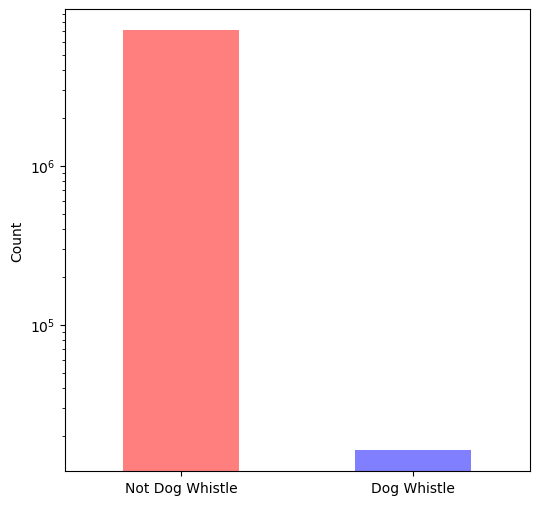

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
n, bins, patches = ax.hist(df_full['label'], range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
ax.set_xticks([0, 1], labels=['Not Dog Whistle', 'Dog Whistle'])
ax.set_xlim(-0.5, 1.5)
ax.set_yscale('log')
ax.set_ylabel('Count')
fig.savefig("dataset_hist_label.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

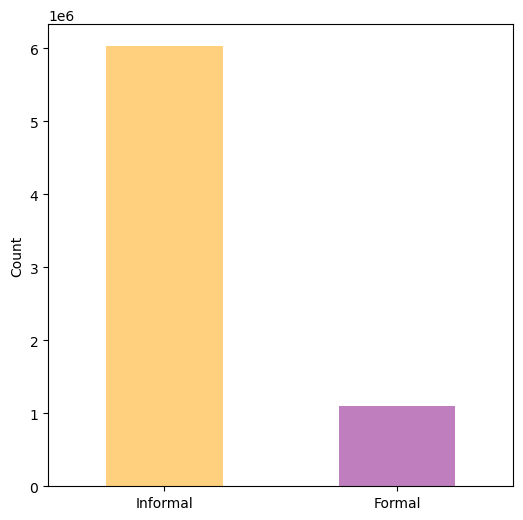

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
n, bins, patches = ax.hist(df_full['type'], range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('orange')
patches[1].set_facecolor('purple')
ax.set_xticks([0, 1], labels=['Informal', 'Formal'])
ax.set_xlim(-0.5, 1.5)
# ax.set_yscale('log')
ax.set_ylabel('Count')
fig.savefig("dataset_hist_type.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

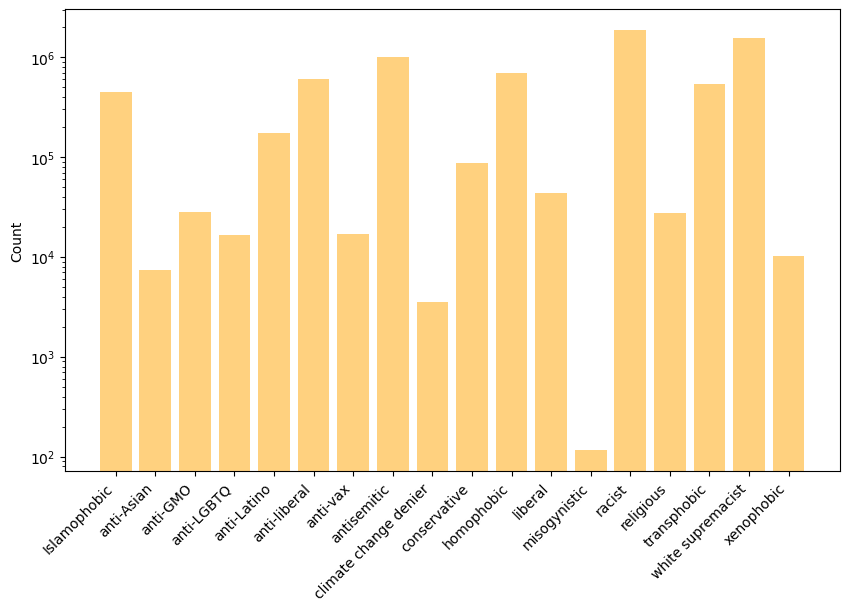

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
labels, counts = np.unique(df_full['ingroup'], return_counts=True)
ticks = range(len(counts))
ax.bar(ticks, counts, color='orange', alpha=0.5, align='center')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_xticks(ticks, labels)
ax.set_xticklabels(labels, rotation=45, ha='right')
fig.savefig("dataset_hist_ingroup.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [18]:
dataset_full = Dataset.from_pandas(df_full)

In [19]:
print(dataset_full)

Dataset({
    features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
    num_rows: 7118453
})


In [30]:
dataset_full.push_to_hub("AstroAure/dogwhistle_dataset")

Pushing dataset shards to the dataset hub:   0%|          | 0/5 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1424 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1424 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1424 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1424 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1424 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

## Update dataset - 1

In [2]:
ds = load_dataset("AstroAure/dogwhistle_dataset")

Found cached dataset parquet (C:/Users/aurel/.cache/huggingface/datasets/AstroAure___parquet/AstroAure--dogwhistle_dataset-9328aa157d7853f8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = ds['train'].to_pandas()

In [4]:
len(df)

7118453

### Remove emojis

In [5]:
idx = []
for i in tqdm(range(len(df))):
    try:
        if emoji.emoji_count(df['content'][i]) > 0:
            idx.append(i)
    except:
        # print(f"Error at index {i}: {df['content'][i]}")
        idx.append(i)
print(len(idx))

100%|██████████| 7118453/7118453 [07:45<00:00, 15293.49it/s]

60305


In [6]:
df.drop(index=idx, inplace=True)
df.reset_index(drop=True, inplace=True)

### Split the dataset

In [7]:
ds = Dataset.from_pandas(df)

In [8]:
ds = ds.train_test_split(test_size=0.1, shuffle=True, seed=42)

### Balance dataset

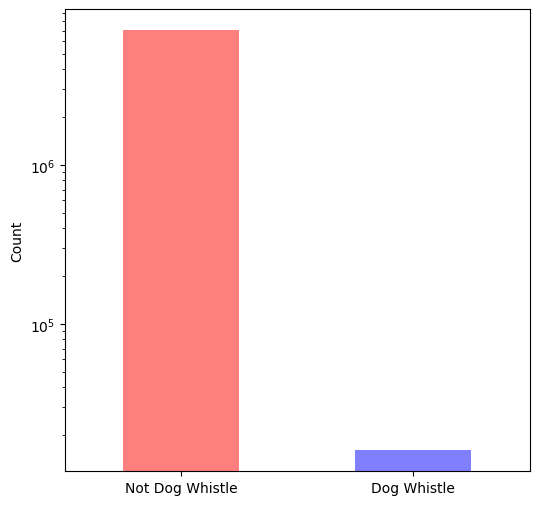

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
n, bins, patches = ax.hist(df['label'], range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
ax.set_xticks([0, 1], labels=['Not Dog Whistle', 'Dog Whistle'])
ax.set_xlim(-0.5, 1.5)
ax.set_yscale('log')
ax.set_ylabel('Count')
# fig.savefig("dataset_hist_label.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [10]:
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['label']), df['label'])

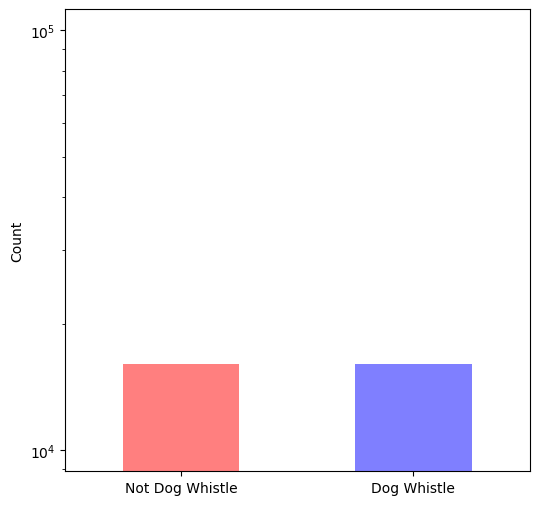

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
n, bins, patches = ax.hist(y_resampled, range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
ax.set_xticks([0, 1], labels=['Not Dog Whistle', 'Dog Whistle'])
ax.set_xlim(-0.5, 1.5)
ax.set_yscale('log')
ax.set_ylabel('Count')
# fig.savefig("dataset_hist_label.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [12]:
df_resampled = pd.DataFrame(X_resampled)
df_resampled['label'] = y_resampled
print(len(df_resampled))

32140


In [13]:
df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)

In [14]:
df_resampled.head(10)

,content,dog_whistle,ingroup,type,label
0,"He doubles down, pays a 3rd party PR firm (NYT...",global cabal,antisemitic,Informal,1
1,We respectfully request that you vote no on an...,balancing the budget,conservative,Formal,1
2,Retreat would result in instability in the reg...,radical Islam,Islamophobic,Formal,1
3,"But, given the fact that Bernie will NEVER get...",MAGA,white supremacist,Informal,0
4,I'm just saying every person is good looking i...,Hollywood,antisemitic,Informal,0
5,The only ones who will remember are those acti...,globalist,antisemitic,Informal,1
6,There's gonna be high demand for therapists th...,Soros,antisemitic,Informal,1
7,Younger conservatives have been exposed to not...,cuckservatives,white supremacist,Informal,1
8,"In my view, any guy that's sticking around for...",single mom,racist,Informal,1
9,I forgot to note: Forgive any and all potentia...,single,homophobic,Informal,0


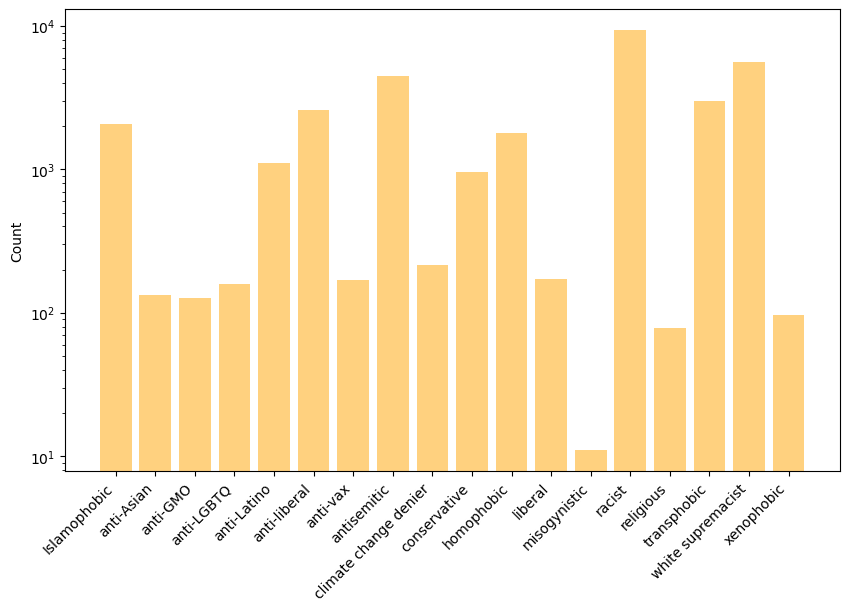

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
labels, counts = np.unique(df_resampled['ingroup'], return_counts=True)
ticks = range(len(counts))
ax.bar(ticks, counts, color='orange', alpha=0.5, align='center')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_xticks(ticks, labels)
ax.set_xticklabels(labels, rotation=45, ha='right')
# fig.savefig("dataset_hist_ingroup.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [16]:
def resample(ds):
    df = ds.to_pandas()
    ros = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['label']), df['label'])
    df_resampled = pd.DataFrame(X_resampled)
    df_resampled['label'] = y_resampled
    df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)
    return Dataset.from_pandas(df_resampled)

In [17]:
balanced_train = resample(ds['train'])

In [18]:
balanced_test = resample(ds['test'])

In [19]:
ds = DatasetDict({
    'train': ds['train'],
    'test': ds['test'],
    'train_balanced': balanced_train,
    'test_balanced': balanced_test,
})

In [20]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 6352333
    })
    test: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 705815
    })
    train_balanced: Dataset({
        features: ['content', 'dog_whistle', 'ingroup', 'type', 'label'],
        num_rows: 28900
    })
    test_balanced: Dataset({
        features: ['content', 'dog_whistle', 'ingroup', 'type', 'label'],
        num_rows: 3240
    })
})


### Upload dataset

In [21]:
ds.push_to_hub("AstroAure/dogwhistle_dataset")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/4 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/5 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/706 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train_balanced to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_balanced to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

## Update dataset - 2

In [2]:
ds = load_dataset("AstroAure/dogwhistle_dataset")

Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/6352333 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/705815 [00:00<?, ? examples/s]

Generating test_balanced split:   0%|          | 0/3240 [00:00<?, ? examples/s]

Generating train_balanced split:   0%|          | 0/28900 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/aurel/.cache/huggingface/datasets/AstroAure___parquet/AstroAure--dogwhistle_dataset-d749ea36d1238803/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
df = ds['train_balanced'].to_pandas()
df.head(10)

,label,content,dog_whistle,ingroup,type
0,1,Although I believe we must be extremely carefu...,institution of marriage,homophobic,Formal
1,1,Good. Swedish cuckolds are an infestation on s...,cuckolds,white supremacist,Informal
2,0,"Ah, gotcha, you're not an SJW, just didn't lik...",SJW,anti-liberal,Informal
3,0,It is currently fashionable to say that all of...,special interest,antisemitic,Formal
4,0,You may be aware that corporate logos hint at ...,cabal,antisemitic,Informal
5,1,as we grow energy sources that are American pr...,working families,racist,Formal
6,1,Even if it were possible to alter every cell o...,male socialization,transphobic,Informal
7,1,I think he'll probably be dropped by sponsors ...,SJW,anti-liberal,Informal
8,1,Thank you for your support fellow centipede an...,centipede,white supremacist,Informal
9,0,Many special interests have been indignant bec...,special interest,antisemitic,Formal


### Hide some dogwhistles

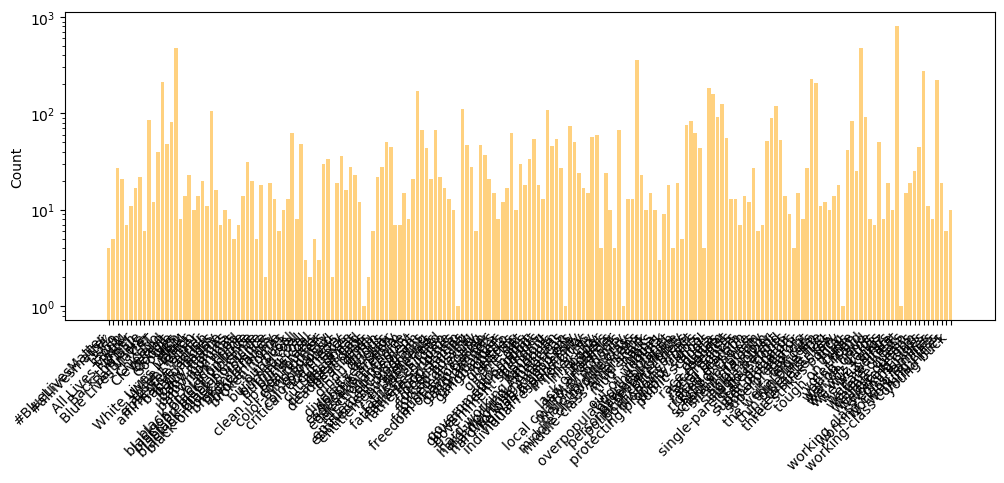

In [4]:
dogwhistle, count = np.unique(df['dog_whistle'][np.where(df['ingroup']=='racist')[0]], return_counts=True)

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(dogwhistle, count, color='orange', alpha=0.5, align='center')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_xticks(dogwhistle, dogwhistle)
ax.set_xticklabels(dogwhistle, rotation=45, ha='right')
plt.show()

In [5]:
dogwhistle = np.unique(df['dog_whistle'])
np.random.seed(88)
dogwhistle_hide = np.random.choice(dogwhistle, int(0.05*len(dogwhistle)), replace=False)
print(f"{len(dogwhistle_hide)} of {len(dogwhistle)} dog whistles hidden")
print(dogwhistle_hide)
print(f"{np.isin(df['dog_whistle'], dogwhistle_hide).sum()}/{len(df)} ({np.isin(df['dog_whistle'], dogwhistle_hide).sum()/len(df):.2%}) removed")

34 of 696 dog whistles hidden
['identitarians' 'family values' 'octopus' 'illegal immigrant'
 'rootless cosmopolitans' 'womxn' 'gender-critical feminism' 'genderists'
 'Kekistan' 'fatherless' 'biological realist' 'Trilateral Commission'
 'judicial activists' 'neolibs' 'pilpul' '#alllivesmatter' 'goyim'
 'public school' 'welfare cheats' 'deadbeats' 'physical removal' '41'
 'global elite' 'genderfree' 'Hollywood elites' 'Reagan' 'China Virus'
 'inner cities' 'shekels' 'protect women and girls' 'broken family' 'blue'
 'dindu' 'Skittle']
1260/28900 (4.36%) removed


In [6]:
df_hidden_train = df[~np.isin(df['dog_whistle'], dogwhistle_hide)]
df_hidden_train = df_hidden_train.sample(frac=1).reset_index(drop=True)

df_test = ds['test_balanced'].to_pandas()
df_hidden_test = df_test[~np.isin(df_test['dog_whistle'], dogwhistle_hide)]
df_hidden_test = df_hidden_test.sample(frac=1).reset_index(drop=True)

len(df_hidden_train), len(df_hidden_test)

(27640, 3111)

In [7]:
ds_hidden = DatasetDict({
    'train_hidden': Dataset.from_pandas(df_hidden_train),
    'test_hidden': Dataset.from_pandas(df_hidden_test),
})
ds_hidden

DatasetDict({
    train_hidden: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 27640
    })
    test_hidden: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 3111
    })
})

### Balance ingroups

In [8]:
df = pd.concat([ds_hidden['train_hidden'].to_pandas(), ds_hidden['test_hidden'].to_pandas()], ignore_index=True)

In [9]:
df.head(10)

,label,content,dog_whistle,ingroup,type
0,0,Same here. I've mostly stopped watching Last W...,political correctness,racist,Informal
1,0,This has a lot to do with censorship. From wha...,MAGA,white supremacist,Informal
2,0,I also wanted grooming that acknowledged my re...,grooming,anti-LGBTQ,Informal
3,1,Actually it’s amazing that 5% went to anything...,global cabal,antisemitic,Informal
4,0,Oh they are the biggest sham! There was a fuck...,voter fraud,racist,Informal
5,0,&gt; 28% of women were classified as having AG...,based,white supremacist,Informal
6,1,that was one of the reasons he wasn’t on the n...,based,white supremacist,Informal
7,0,Pedes spread this image like your lives depend...,pedes,white supremacist,Informal
8,0,He also got food stamps because taking 12 hour...,food stamp,racist,Informal
9,0,I'm on my way transforming from beta white kni...,beta,white supremacist,Informal


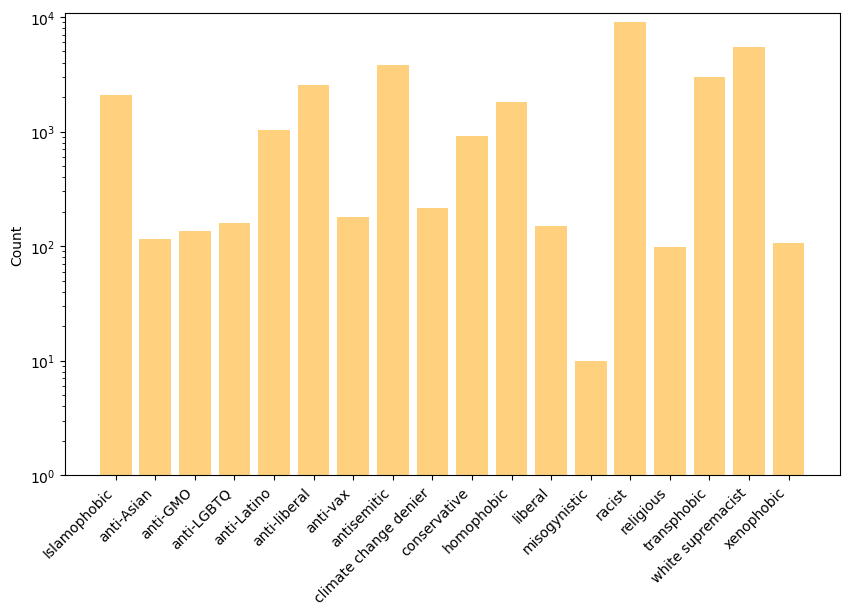

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ingroup, count = np.unique(df['ingroup'], return_counts=True)
ax.bar(ingroup, count, color='orange', alpha=0.5, align='center')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_ylim(1, 1.2*max(count))
ax.set_xticks(ingroup, ingroup)
ax.set_xticklabels(ingroup, rotation=45, ha='right')
plt.show()

In [11]:
# Remove 'misogynistic' because not enough
df = df[df['ingroup'] != 'misogynistic']
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
ingroup_counts = df['ingroup'].value_counts()
print(ingroup_counts)

ingroup
racist                   8969
white supremacist        5449
antisemitic              3810
transphobic              2970
anti-liberal             2565
Islamophobic             2072
homophobic               1798
anti-Latino              1034
conservative              913
climate change denier     217
anti-vax                  178
anti-LGBTQ                160
liberal                   151
anti-GMO                  136
anti-Asian                115
xenophobic                106
religious                  98
Name: count, dtype: int64


In [13]:
df_lower = df[np.isin(df['ingroup'], ingroup_counts[np.where(ingroup_counts < 2000)[0]].index.tolist())]
df_lower = df_lower.sample(frac=1).reset_index(drop=True)

df_upper = df[np.isin(df['ingroup'], ingroup_counts[np.where(ingroup_counts >= 2000)[0]].index.tolist())]
df_upper = df_upper.sample(frac=1).reset_index(drop=True)

In [14]:
df_lower

,label,content,dog_whistle,ingroup,type
0,0,IMO it's best to hang out with them as long as...,Pajeet,anti-Asian,Informal
1,1,"When police pull over a black male, or encount...",implicit bias,liberal,Informal
2,0,"Prior to America's ""intervention"" of Afghanist...",single,homophobic,Informal
3,1,The results of this are really quite devastati...,illegal alien,anti-Latino,Formal
4,0,I can't imagine that even a single Supreme Cou...,single,homophobic,Informal
...,...,...,...,...,...
4901,1,But we had promised the American people we wou...,balance the budget,conservative,Formal
4902,0,Definitely there is FOB style. I've had FOBs j...,single,homophobic,Informal
4903,1,AoC says the world will end in 12 years unless...,climate alarmists,climate change denier,Informal
4904,0,Please seek higher education; send me the cost...,send me,religious,Informal


In [15]:
ros = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_upper.drop(columns=['ingroup']), df_upper['ingroup'])
df_upper_resampled = pd.DataFrame(X_resampled)
df_upper_resampled['ingroup'] = y_resampled
df_upper_resampled = df_upper_resampled.sample(frac=1).reset_index(drop=True)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df_lower.drop(columns=['ingroup']), df_lower['ingroup'])
df_lower_resampled = pd.DataFrame(X_resampled)
df_lower_resampled['ingroup'] = y_resampled
df_lower_resampled = df_lower_resampled.sample(frac=1).reset_index(drop=True)

In [16]:
df = pd.concat([df_upper_resampled, df_lower_resampled], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['ingroup']), df['ingroup'])
df_resampled = pd.DataFrame(X_resampled)
df_resampled['ingroup'] = y_resampled
df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['label']), df['label'])
df_resampled = pd.DataFrame(X_resampled)
df_resampled['label'] = y_resampled
df_resampled = df_resampled.sample(frac=1).reset_index(drop=True)

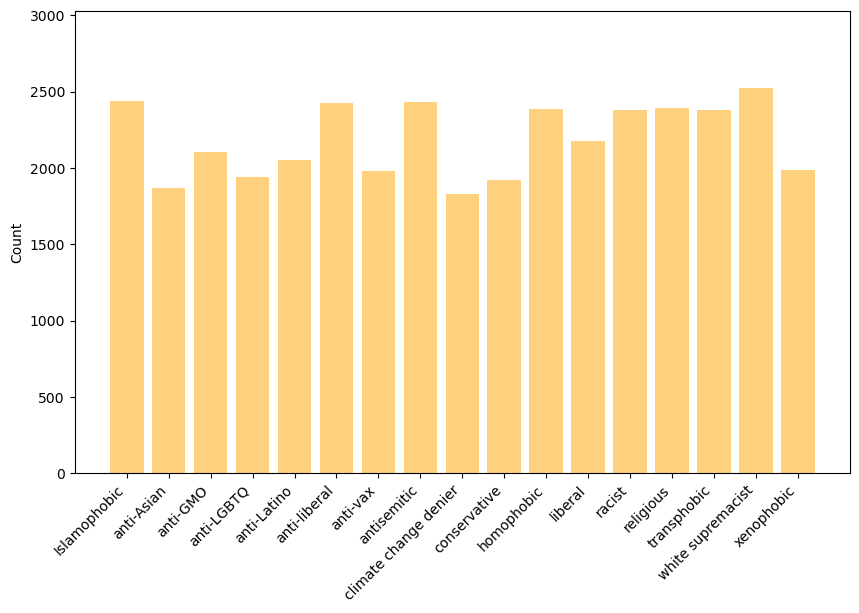

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ingroup, count = np.unique(df_resampled['ingroup'], return_counts=True)
ax.bar(ingroup, count, color='orange', alpha=0.5, align='center')
ax.set_ylabel('Count')
ax.set_ylim(0, 1.2*max(count))
ax.set_xticks(ingroup, ingroup)
ax.set_xticklabels(ingroup, rotation=45, ha='right')
fig.savefig("dataset-bhr_hist_ingroup.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

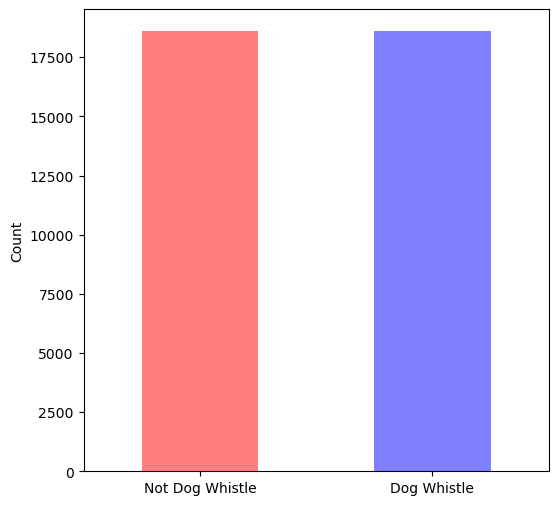

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
n, bins, patches = ax.hist(df_resampled['label'], range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
ax.set_xticks([0, 1], labels=['Not Dog Whistle', 'Dog Whistle'])
ax.set_xlim(-0.5, 1.5)
# ax.set_yscale('log')
ax.set_ylabel('Count')
fig.savefig("dataset-bhr_hist_label.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

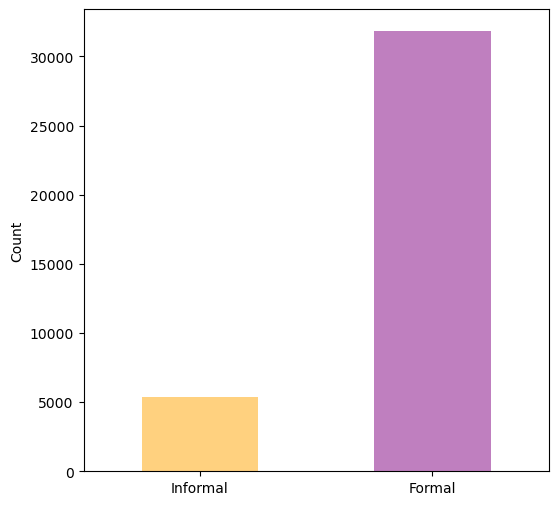

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
n, bins, patches = ax.hist(df_resampled['type'], range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('orange')
patches[1].set_facecolor('purple')
ax.set_xticks([0, 1], labels=['Informal', 'Formal'])
ax.set_xlim(-0.5, 1.5)
# ax.set_yscale('log')
ax.set_ylabel('Count')
fig.savefig("dataset-bhr_hist_type.png", dpi=250, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [20]:
ds_resampled = Dataset.from_pandas(df_resampled)
ds_resampled = ds_resampled.train_test_split(test_size=0.1, shuffle=True, seed=42)
ds_resampled

DatasetDict({
    train: Dataset({
        features: ['content', 'dog_whistle', 'type', 'ingroup', 'label'],
        num_rows: 33472
    })
    test: Dataset({
        features: ['content', 'dog_whistle', 'type', 'ingroup', 'label'],
        num_rows: 3720
    })
})

### Upload dataset

In [21]:
ds_new = DatasetDict({
    'train': ds['train'],
    'test': ds['test'],
    'train_b': ds['train_balanced'],
    'test_b': ds['test_balanced'],
    'train_bh': ds_hidden['train_hidden'],
    'test_bh': ds_hidden['test_hidden'],
    'train_bhr': ds_resampled['train'],
    'test_bhr': ds_resampled['test'],
})
print(ds_new)

DatasetDict({
    train: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 6352333
    })
    test: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 705815
    })
    train_b: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 28900
    })
    test_b: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 3240
    })
    train_bh: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 27640
    })
    test_bh: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 3111
    })
    train_bhr: Dataset({
        features: ['content', 'dog_whistle', 'type', 'ingroup', 'label'],
        num_rows: 33472
    })
    test_bhr: Dataset({
        features: ['content', 'dog_whistle', 'type', 'ingroup', 'lab

In [22]:
ds_new['train_bhr'].to_pandas().head(10)

,content,dog_whistle,type,ingroup,label
0,Lmfao. You're being downvoted for being a bull...,groomer,Informal,anti-LGBTQ,1
1,Now you gotta send me an mspaint drawing of a ...,send me,Informal,religious,0
2,Plus they act like Ivermectin isn't made by a ...,big pharma,Informal,anti-vax,1
3,i question why you're even around this subredd...,single,Informal,homophobic,0
4,The effectiveness of this amendment is in the ...,job creation,Formal,conservative,1
5,"Right, but when you need their votes and suppo...",alarmist,Informal,climate change denier,1
6,I would hope that the first way that we would ...,balancing the budget,Formal,conservative,0
7,Karen Straughan was not exaggerating. I am sti...,working families,Informal,racist,0
8,It's a tool for them to destroy power entities...,Judeo-Christian,Informal,Islamophobic,1
9,Instead of worrying about Government or some a...,handout,Formal,racist,1


In [23]:
ds_new.push_to_hub("AstroAure/dogwhistle_dataset")

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/4 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/4 [00:00<?, ?it/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/706 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train_b to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_b to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train_bh to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_bh to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train_bhr to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/34 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_bhr to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

## Hidden test set

In [2]:
ds = load_dataset("AstroAure/dogwhistle_dataset")

Found cached dataset parquet (C:/Users/aurel/.cache/huggingface/datasets/AstroAure___parquet/AstroAure--dogwhistle_dataset-6d764eab07d1c308/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/9 [00:00<?, ?it/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 6352333
    })
    test: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 705815
    })
    test_b: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 3240
    })
    test_bh: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 3111
    })
    test_bhr: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 3720
    })
    test_hidden: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 889
    })
    train_b: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'type'],
        num_rows: 28900
    })
    train_bh: Dataset({
        features: ['label', 'content', 'dog_whistle', 'ingroup', 'typ

In [7]:
df = ds['train_b'].to_pandas()

In [8]:
hidden_dogwhistle = ['send me','illegal immigrant','Trilateral Commission','bugman','property rights','Judeo-Christian values','gender abolitionist','young buck','cuckservatives','deadbeat','tax cut','disloyalty','international banks','erasure of women','gender abolitionists','superpredators','bix nood','agender','biological realist','hardworking American','oy vey','wombyn','shekel','colorblind','#alllivesmatter','natal men','physical removal','the Fed' "don't see color" 'personal responsibility','string-pullers','biological men','Judeo-Christian','41']

df_hidden = df[df['dog_whistle'].isin(hidden_dogwhistle)]
df_hidden = df_hidden.sample(frac=1).reset_index(drop=True)
len(df_hidden)

889

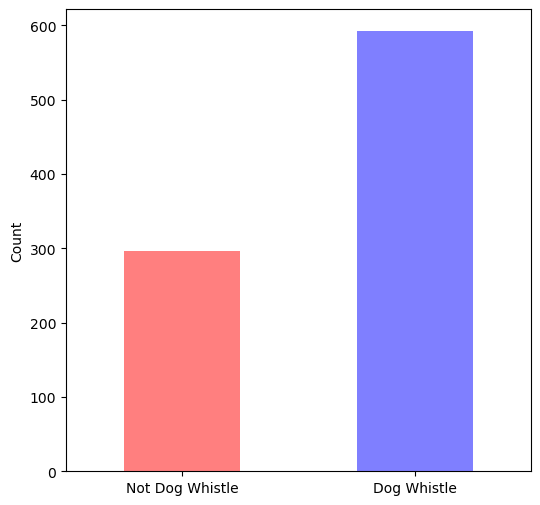

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
n, bins, patches = ax.hist(df_hidden['label'], range=(-0.5,1.5), bins=2, alpha=0.5, rwidth=0.5)
patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
ax.set_xticks([0, 1], labels=['Not Dog Whistle', 'Dog Whistle'])
ax.set_xlim(-0.5, 1.5)
# ax.set_yscale('log')
ax.set_ylabel('Count')
plt.show()

In [12]:
ds_hidden = DatasetDict({
    'test': ds['test'],
    'train': ds['train'],
    'train_b': ds['train_b'],
    'test_b': ds['test_b'],
    'train_bh': ds['train_bh'],
    'test_bh': ds['test_bh'],
    'train_bhr': ds['train_bhr'],
    'test_bhr': ds['test_bhr'],
    'test_hidden': Dataset.from_pandas(df_hidden),
})
ds_hidden.push_to_hub("AstroAure/dogwhistle_dataset")

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/706 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/4 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1589 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/4 [00:00<?, ?it/s]

Pushing split train_b to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/29 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_b to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train_bh to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_bh to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split train_bhr to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/34 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_bhr to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test_hidden to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]